# Calculate local SWCF (regression between monthly local SWCRE and SST anomalies) using all observational SST renanalysis and CERES radiation

In [1]:
import os
import sys

import numpy as np
import xarray as xr
import xcdat as xc
import xskillscore as xscore

# Load Data

## Utils

In [2]:
def load_sst(product_name="ERA5", start_time="1870-01-01", end_time="2019-12-31"):
    lat = np.arange(-88.75, 90, 2.5)
    lon = np.arange(-178.75, 180, 2.5)
    output_grid = xc.create_grid(lat, lon)

    ###### PREPROCESSING ######
    if product_name == "ERA5":
        ds = xc.open_dataset("/home/espinosa10/tropical_pacific_clouds/data/obs/ts_mon_ERA5_197901-202212.nc").rename({"skt": "sst"}).sel(time=slice(start_time, end_time))
    
    elif product_name == 'vc_E3SM-2-0hist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='E3SM-2-0hist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
    
    elif product_name == 'vc_NorESM2-LMhist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='NorESM2-LMhist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_EC-Earth3hist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='EC-Earth3hist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_CESM2hist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='CESM2hist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_UKESM1.0-LLhist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='UKESM1.0-LLhist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_GFDL-ESM4hist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='GFDL-ESM4hist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_SAM0-UNICONhist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='SAM0-UNICONhist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == 'vc_HadGEM3-GC31-LLhist':
        vc = xr.open_dataset("/home/espinosa10/zac_20250220/sstanom_8priors_v0.nc")
        ds = vc.sel(prior='HadGEM3-GC31-LLhist', time=slice(start_time, end_time)).rename({"lon": "longitude", "lat": "latitude", "tos": "sst"})
        ds = ds.drop(["mask", "nino34", "so", "zonal_sst", "prior", "wts"])
        
    elif product_name == "NOAA-ERSSTv5":
        # ds = xc.open_dataset("/home/espinosa10/tropical_pacific_clouds/data/obs/NOAA_ERSST_V5_sst.mnmean.nc").sel(time=slice(start_time, end_time))
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input/NOAA-PSL/ERSST5/v20231110/ERSST.5.sst.mnmean.nc").sel(time=slice(start_time, end_time))
        ds = ds.rename({"lon": "longitude", "lat": "latitude"})
        
    elif product_name == "COBE":
        # ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/COBE/sst.mon.mean.nc").sel(time=slice(start_time, end_time)) #"2017-12-31"))
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input/NOAA-PSL/COBE1/v20230526/COBE.1.sst.mon.mean.nc").sel(time=slice(start_time, end_time)) #"2017-12-31"))
        ds = ds.rename({"lon": "longitude", "lat": "latitude"})

    elif product_name == "COBE2":
        # ds = xc.open_dataset("/home/espinosa10/tropical_pacific_clouds/data/obs/COBE2.sst.mon.mean.nc").sel(time=slice(start_time, end_time))
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input/NOAA-PSL/COBE2/v20230526/COBE.2.sst.mon.mean.nc").sel(time=slice(start_time, end_time))
        ds = ds.rename({"lon": "longitude", "lat": "latitude"})
        
    elif product_name == "NOAA-OISST-v2.1":
        ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/NOAA-OISST-v2.1/sst.mon.mean.nc")
        ds = ds.rename({"lon": "longitude", "lat": "latitude"}).sel(time=slice("1982-01-01", end_time))
        
    elif product_name == "NOAA-OISST-v2.0":
        ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/NOAA-OISST-v2/sst.mnmean.nc")
        ds = ds.rename({"lon": "longitude", "lat": "latitude"}).sel(time=slice(start_time, end_time))
        
    elif product_name == "HadISST-1.1":
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input//MOHC/HadISST1-1/v20231114/HadISST.1.1.sst.nc").sel(time=slice(start_time, end_time)) #"2017-12-31"))
        ds["sst"] = xr.where(ds["sst"] == -1000, np.nan, ds["sst"]) # Some polar points are -1000

    elif product_name == "HadISST-2.2":
        # ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/HadISST/HadISST-2-2-0-0-0.nc").rename({"tos": "sst"})
        ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/HadISST/HadISST-2-2-0-0-0.nc").rename({"tos": "sst"})
        ds = ds.rename({"lon": "longitude", "lat": "latitude"})

    elif product_name == "HadISST-2.3":
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input/MOHC/HadISST2-3/v20230526/HadISST.2.3.0.c_ensemble_member_001.nc").rename({"tos": "sst"}).sel(time=slice(start_time, end_time)) #"2019-12-31"))

    elif product_name == "HadISST-2.4":
        ds = xc.open_dataset("/p/user_pub/PCMDIobs/obs4MIPs_input/MOHC/HadISST2-4/v20241002/HadISST.2.4.0.0_ensemble_member_001_sst.nc").sel(time=slice(start_time, end_time)) #"2019-12-31"))

    elif product_name == "HadSST4":
        ds = xc.open_dataset("/p/user_pub/climate_work/zelinka1/HadSST/HadSST.4.0.1.0_median.nc").rename({"tos": "sst"}).sel(time=slice(start_time, end_time))

    elif product_name == "PCMDI-AMIP-1-1-9":
        ds = xc.open_dataset("/p/user_pub/work/input4MIPs/CMIP6Plus/CMIP/PCMDI/PCMDI-AMIP-1-1-9/ocean/mon/tos/gn/v20230512/tos_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-9_gn_187001-202212.nc").rename({"tos": "sst"})
        ds = ds.rename({"lon": "longitude", "lat": "latitude"}).sel(time=slice(start_time, end_time))
    else: 
        return
        
    
    ###### PREPROCESSING ######
    ds = remove_land_full(ds, var="sst").rename("sst").to_dataset()
    ds = fix_coords(ds, include_T=True)
    ds = ds.reindex(latitude=list(reversed(ds.latitude)))
    # Calculate Anomalies
    ds = ds.temporal.departures("sst", "month")
    # Regrid to 2.5x2.5 degree grid
    ds = ds.regridder.horizontal("sst", output_grid, tool='xesmf', method='bilinear')
    ds = ds.rename({"lon": "longitude", "lat": "latitude"})
    # Detrend
    # ds["sst"] = detrend(ds["sst"])

    # Get SST Anomlies in Southern Ocean
    so_mean = ds["sst"].sel(longitude=slice(-180, -75), latitude=slice(-70, -50))
    so_mean = (fix_coords(so_mean.rename("tos").to_dataset(), include_T=False)).spatial.average("tos")["tos"]

    return ds, so_mean

In [3]:
def load_ceres_obs(region: str = "toa", flux: str = "swcre"):
    """Load CERES Data depending on region and flux

    Args:
        region (str, optional): _description_. Defaults to "toa".
        flux (str, optional): _description_. Defaults to "swcre".
    """
    # Create dictionary between CMIP naming conventions and CERES naming conventions
    variables = ['clt','rsdt','rsut','rsutcs','rsds','rsus','rsdscs','rsuscs', "rlds", "rldscs", "lwcre-surface", "swcre-surface", "cre-surface"]
    native = ['cldarea_total_daynight_mon','solar_mon','toa_sw_all_mon','toa_sw_clr_t_mon', 'sfc_sw_down_all_mon','sfc_sw_up_all_mon','sfc_sw_down_clr_t_mon','sfc_sw_up_clr_t_mon',
              'sfc_lw_down_all_mon', 'sfc_lw_down_clr_t_mon', 'sfc_cre_net_lw_mon', 'sfc_cre_net_sw_mon', 'sfc_cre_net_tot_mon']

    var_dic=dict(zip(variables,native))

    if region == "toa": 
        # ceres = xc.open_dataset("data/obs/CERES_EBAF-TOA_Ed4.1_Subset_200003-202201.nc")
        ceres = xr.open_dataset("/p/user_pub/work/scratch/zelinka1/CERES/CERES_EBAF-TOA_Ed4.2.1_Subset_200003-202412.nc")

        if flux == "swcre":
            swas = remove_land(ceres, var="toa_sw_all_mon")
            swcs = remove_land(ceres, var="toa_sw_clr_c_mon")
            swcre = swcs - swas # Clear Sky minus All Sky
            return swcre

        if flux == "lwcre":
            lwas = remove_land(ceres, var="toa_lw_all_mon")
            lwcs = remove_land(ceres, var="toa_lw_clr_c_mon")
            lwcre = lwcs - lwas # Clear Sky minus All Sky
            return lwcre
        
        if flux == "cre":
            nas = remove_land(ceres, var="toa_net_all_mon")
            ncs = remove_land(ceres, var="toa_net_clr_c_mon")
            cre = -(ncs - nas) # Clear Sky minus All Sky (These are both incoming/downard fluxes, so we need to flip the sign)
            return cre
    
    if region == "surface":
        ceres = xr.open_mfdataset(["/p/user_pub/climate_work/zelinka1/CERES/CERES_EBAF_Ed4.2_Subset_200003-201412.nc", "/p/user_pub/climate_work/zelinka1/CERES/CERES_EBAF_Ed4.2_Subset_201501-202212.nc"])
        ceres_lw = xr.open_dataset("/p/user_pub/climate_work/zelinka1/CERES/CERES_EBAF_Ed4.1_Subset_200003-202111.nc")

        sw = remove_land(ceres, var=var_dic["rsds"]) - remove_land(ceres, var=var_dic["rsus"]) # Net Downward Shortwave Radiation
        swc = remove_land(ceres, var=var_dic["rsdscs"]) - remove_land(ceres, var=var_dic["rsuscs"])# Net Downward Clear-sky Shortwave Radiation
        swcre = sw - swc # Shortwave Cloud Radiative Effect (Surface Downward)
        # lwcre = remove_land(ceres_lw, var=var_dic["rlds"]) - remove_land(ceres_lw, var=var_dic["rldscs"]) # Longwave Cloud Radiative Effect (Surface Downward)

        if flux == "swcre":
            return swcre

        if flux == "lwcre":
            lwcre = remove_land(ceres_lw, var=var_dic["lwcre-surface"]) # Longwave Cloud Radiative Effect (Surface Downward)
            return lwcre 
        
        if flux == "cre":
            cre = remove_land(ceres_lw, var=var_dic["cre-surface"]) # Longwave Cloud Radiative Effect (Surface Downward)
            return cre


def regrid_and_anomalies(cre, cre_name: str = "swcre"):
    ## REGRID SWCRE
    lat = np.arange(-88.75, 90, 2.5)
    lon = np.arange(-178.75, 180, 2.5)
    output_grid = xc.create_grid(lat, lon)

    cre_ds = fix_coords(cre.rename(cre_name).to_dataset())
    cre_regrid = cre_ds.regridder.horizontal(cre_name, output_grid, tool='xesmf', method='bilinear')
    cre_regrid["time"] = np.arange(cre_regrid.time.values[0], np.datetime64(cre_regrid.time.values[-1], 'M') + np.timedelta64(1,'M'), dtype="datetime64[M]")
    cre_regrid = cre_regrid.rename({"lon": "longitude", "lat": "latitude"})

    # Calculate Anomalies
    cre_regrid = fix_coords(cre_regrid, include_T=True).temporal.departures(cre_name, "month")

    return cre_regrid

def remove_land(ds, var="skt"):
    ds = xc.swap_lon_axis(ds, to=(-180, 180))
    from global_land_mask import globe
    # Set land to NaN
    lon_grid,lat_grid = np.meshgrid(ds.lon, ds.lat)
    globe_land_mask = globe.is_land(lat_grid,lon_grid)
    globe_land_mask_nd = np.tile(globe_land_mask,(ds[var].shape[0],1,1))
    ds_no_land = xr.where(globe_land_mask_nd==True,np.nan,ds[var]) 
    return ds_no_land

def remove_land_full(ds, var="skt"):
    """
    Remove land from dataset using global_land_mask
    """
    ds = xc.swap_lon_axis(ds, to=(-180, 180))
    from global_land_mask import globe
    # Set land to NaN
    lon_grid,lat_grid = np.meshgrid(ds.longitude, ds.latitude)
    globe_land_mask = globe.is_land(lat_grid,lon_grid)
    globe_land_mask_nd = np.tile(globe_land_mask,(ds[var].shape[0],1,1))
    ds_no_land = xr.where(globe_land_mask_nd==True,np.nan,ds[var]) 
    return ds_no_land

def fix_coords(data, include_T=True):
    data = data.bounds.add_bounds("X")
    data = data.bounds.add_bounds("Y")
    if include_T: data = data.bounds.add_bounds("T")
    data = xc.swap_lon_axis(data, to=(-180, 180))
    return data


## Data

In [4]:
# Get TOA SWCF
swcre_anoms = regrid_and_anomalies(load_ceres_obs(region="toa", flux="swcre"), cre_name="swcre")
swcre_anoms

/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
2025-04-17 09:08:01,370 [WARNING]: temporal.py(_set_data_var_attrs:832) >> 'time' does not have a calendar encoding attribute set, which is used to determine the `cftime.datetime` object type for the output time coordinates. Defaulting to CF 'standard' calendar. Otherwise, set the calendar type (e.g., ds['time'].encoding['calendar'] = 'noleap') and try again.
2025-04-17 09:08:01,381 [WARNING]: temporal.py(_set_data_var_attrs:832) >> 'time' does not have a calendar encoding attribute set, which is used to determine the `cftime.datetime` object type for the output time coordinates. Defaulting to CF 'standard' calendar. Otherwise, set the calendar type (e.g., ds['time'].encoding['calendar'] = 'noleap') and try again.


<xarray.Dataset>
Dimensions:    (time: 298, latitude: 72, longitude: 144, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2000-03-01 2000-04-01 ... 2024-12-01
  * latitude   (latitude) float64 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float64 -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
Dimensions without coordinates: bnds
Data variables:
    swcre      (time, latitude, longitude) float64 nan nan ... -0.002762
    lat_bnds   (latitude, bnds) float64 -90.0 -87.5 -87.5 ... 87.5 87.5 90.0
    lon_bnds   (longitude, bnds) float64 -180.0 -177.5 -177.5 ... 177.5 -180.0
    time_bnds  (time, bnds) datetime64[ns] 2000-02-14T12:00:00 ... 2024-12-16

In [5]:
SST_PRODUCTS = ["PCMDI-AMIP-1-1-9", "NOAA-ERSSTv5", "COBE", "COBE2", "HadISST-1.1", "HadISST-2.3", "HadISST-2.4", 'vc_E3SM-2-0hist', 'vc_NorESM2-LMhist', 'vc_EC-Earth3hist', 'vc_CESM2hist', 'vc_UKESM1.0-LLhist', 'vc_GFDL-ESM4hist', 'vc_SAM0-UNICONhist', 'vc_HadGEM3-GC31-LLhist']
# for sst_prod in SST_PRODUCTS:
#     ds, _ = load_sst(sst_prod, start_time=str(swcre_anoms.time.isel(time=0).values)[:10], end_time=str(swcre_anoms.time.isel(time=-1).values)[:10])
#     print(sst_prod, "   ", ds.time.values[-1])
ds, _ = load_sst(SST_PRODUCTS[0], start_time=str(swcre_anoms.time.isel(time=0).values)[:10], end_time=str(swcre_anoms.time.isel(time=-1).values)[:10])

# Calculate SWCF

In [19]:
def get_cf_for_obs(cre: xr.Dataset, cre_name: str = "swcre", sf_name: str = "swcf_toa"):
    """Get Cloud feedback for each SST dataset

    Args:
        swcre (_type_): _description_

    Returns:
        _type_: _description_
    """
    cfs_epsa = []
    cfs, cfs_p = [], []
    for product in SST_PRODUCTS: 
        # Open dataset
        ds, _ = load_sst(product, start_time=str(swcre_anoms.time.isel(time=0).values)[:10], end_time="2019-12-31")
        ds["time"] = cre.sel(time=slice("2000-03-01", "2019-12-31")).time
        ssts = ds["sst"]
        cre = cre.sel(time=ds.time)

        # # Select overlapping times between SSTs and SWCRE
        # ssts["time"] = np.arange(ds.time[0].values, np.datetime64(ds.time[-1].values, 'M') + np.timedelta64(1,'M'), dtype="datetime64[M]")
        # shared_times = list(set(ssts.time.values) & set(cre.time.values))
        # ssts = ssts.sel(time=shared_times)
        # cre = cre.sel(time=shared_times)

        # Calculate Cloud Feedback
        cre = cre.chunk({"time": -1}) # Rechunk along time
        ssts = ssts.chunk({"time": -1}) # Rechunk along time
        dcredsst = xscore.linslope(ssts, cre[cre_name], dim="time", skipna=True)
        dcredsst_pvalue = xscore.pearson_r_p_value(ssts, cre[cre_name], dim='time', skipna=True)
        dcredsst = fix_coords(dcredsst.rename("swcf").to_dataset(), include_T=False)
        dcredsst_pvalue = fix_coords(dcredsst_pvalue.rename(f"swcf-pvalues").to_dataset(), include_T=False)
        cfs.append(dcredsst)
        cfs_p.append(dcredsst_pvalue)

        # Calculate Cloud Feedback in EPSA
        cf_epsa = dcredsst.sel(longitude=slice(-105, -70), latitude=slice(-40, -10)).spatial.average("swcf")["swcf"]
        cf_epsa = cf_epsa.rename("swcf").to_dataset()
        cfs_epsa.append(cf_epsa)

    # Merge Cloud Feedbacks from each Obs product into one dataset 
    # cfs = xr.merge(cfs)
    # cfs_epsa = xr.merge(cfs_epsa)
    cfs = xr.concat(cfs, dim="model")
    cfs["model"] = SST_PRODUCTS  # name the new dimension
    cfs_p = xr.concat(cfs_p, dim="model")
    cfs_p["model"] = SST_PRODUCTS  # name the new dimension
    cfs = xr.merge([cfs, cfs_p])

    cfs_epsa = xr.concat(cfs_epsa, dim="model")
    cfs_epsa["model"] = SST_PRODUCTS
    # Save Datasets
    # cfs.to_netcdf(f"data/obs/{sf_name}_obs.nc")
    # cfs_epsa.to_netcdf(f"data/obs/{sf_name}_epsa_obs.nc")
    
    return cfs, cfs_epsa

In [20]:
# Get TOA SWCF
swcf_toa, swcf_toa_epsa = get_cf_for_obs(
    cre=swcre_anoms,
    cre_name="swcre",
    sf_name="swcf_toa",
)
swcf_toa, swcf_toa_epsa

2025-04-17 09:14:31,797 [WARNING]: bounds.py(_create_bounds:398) >> The 'latitude' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-17 09:14:31,823 [WARNING]: bounds.py(_create_bounds:398) >> The 'latitude' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-17 09:14:31,934 [WARNING]: dataset.py(decode_time:341) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2025-04-17 09:14:33,070 [WARNING]: bounds.py(_create_bounds:398) >> The 'latitude' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-17 09:14:33,097 [WARNING]: bounds.py(_create_bounds:398) >> The 'latitude' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-17 09:14:33,202 [WARNING]: dataset.py(decode_time:341) >> 'time' does not have a calendar attribute set. Defaulting to CF 'standard' calendar.
2025-04-17

(<xarray.Dataset>
 Dimensions:         (latitude: 72, longitude: 144, model: 15, bnds: 2)
 Coordinates:
   * latitude        (latitude) float64 -88.75 -86.25 -83.75 ... 86.25 88.75
   * longitude       (longitude) float64 -178.8 -176.2 -173.8 ... 176.2 178.8
   * model           (model) <U22 'PCMDI-AMIP-1-1-9' ... 'vc_HadGEM3-GC31-LLhist'
 Dimensions without coordinates: bnds
 Data variables:
     swcf            (model, latitude, longitude) float64 dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
     longitude_bnds  (model, longitude, bnds) float64 -180.0 -177.5 ... -180.0
     latitude_bnds   (model, latitude, bnds) float64 -90.0 -87.5 ... 87.5 90.0
     swcf-pvalues    (model, latitude, longitude) float64 dask.array<chunksize=(1, 72, 144), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:  (model: 15)
 Coordinates:
   * model    (model) <U22 'PCMDI-AMIP-1-1-9' ... 'vc_HadGEM3-GC31-LLhist'
 Data variables:
     swcf     (model) float64 dask.array<chunksize=(1,), meta=np.ndarray>)

In [ ]:
swcf_toa.to_netcdf(f"/home/espinosa10/SO-EP-teleconnection/Data/obs/swcf-toa-obs.nc")
swcf_toa_epsa.to_netcdf(f"/home/espinosa10/SO-EP-teleconnection/Data/obs/swcf-toa-obs-epsa.nc")

/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_dete

/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:99: RuntimeWarning: Mean of empty slice
  mb = meanfunc(b, axis=axis)
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic

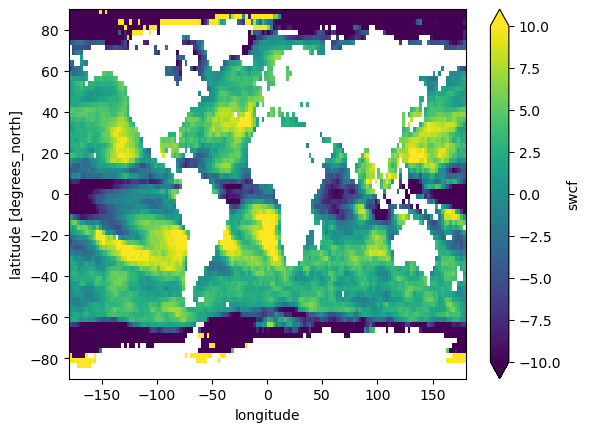

In [14]:
swcf_toa["swcf"].mean("model").plot(vmin=-10, vmax=10)

In [23]:
swcf_toa_epsa.swcf.values

/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_deterministic.py:202: RuntimeWarning: invalid value encountered in divide
  res = s_num / s_den
/home/espinosa10/miniconda3/envs/swc/lib/python3.11/site-packages/xskillscore/core/np_dete

array([7.16902585, 6.91583102, 7.03697043, 6.99258672, 8.04239412,
       7.19320495, 7.2179496 , 7.57249346, 6.28016159, 6.89465646,
       6.64154385, 6.8885895 , 6.84425462, 6.57562404, 7.0795402 ])